# Random Forest
### Random Forest is an ensemble machine learning algorithm that leverages multiple decision trees to enhance predictive accuracy and mitigate overfitting, a common pitfall of individual trees. By aggregating predictions from a collection of trees - each trained on a random subset of data and features - it reduces variance and improves generalization, making it suitable for both classification (e.g., predicting wine quality) and regression tasks. The algorithm assumes that the trees are decorrelated, which is achieved through bagging and feature randomness, though it does not require strict data distribution assumptions. Its high accuracy and resilience to noise make it a powerful tool, but the trade-off includes slower training and inference times due to the ensemble nature, as well as reduced interpretability compared to a single decision tree.

### Use Random Forest as a go-to model for  predictions, with hyperparameter tuning (e.g., number of trees, max depth) to balance performance and computational cost, especially for deployment-ready systems.

| Aspect | Details |
| :- | :- |
| Use For           | Classification (e.g., fraud detection, disease diagnosis)<br>Regression (e.g., house price prediction, quality scoring) |
| Key Assumptions   | - Decorrelation of individual trees via bagging and feature randomness<br>- Independent observations<br>- Sufficient data for ensemble diversity |
| Advantages        | - High accuracy through ensemble averaging<br>- Robust to overfitting and noise<br>- Handles mixed data types with minimal preprocessing |
| Disadvantages     | - Slower training and prediction due to multiple trees<br>- Less interpretable than a single decision tree<br>- Memory-intensive with large ensembles |
| Avoid When        | - Real-time applications requiring low latency<br>- Need for highly interpretable models<br>- Very small datasets lacking diversity |
| Real-World Use Case | Fraud detection (e.g., identifying fraudulent transactions based on spending patterns)<br>Medical diagnosis (e.g., predicting patient outcomes from multiple health metrics) |

## Problem Description: 
### Predict the quality of red wine (rated from 0 to 10) based on physicochemical properties like alcohol content, pH, and volatile acidity. This is a multi-class classification problem where Random Forest can model complex relationships between features and quality ratings.

Using Kaggle dataset https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
project_dir = './04_random_forest'

# load  dataset
data = pd.read_csv(project_dir + '/data/winequality-red.csv')
print("Dataset loaded, shape:", data.shape)

# feature engineering: add total acidity - to increase accuracy - by itself this increases accuracy from 0.63 to 0.7
data['total_acidity'] = data['fixed acidity'] + data['volatile acidity'] + data['citric acid']

# select key features and target variable
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'total_acidity']

X = data[features] 
y = data['quality']
print("Features shape:", X.shape, "Target shape:", y.shape)

# scale features to improve model performance.
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)

Dataset loaded, shape: (1599, 12)
Features shape: (1599, 12) Target shape: (1599,)


In [3]:
# split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print("Train set shape:", X_train.shape, "Test set shape:", X_test.shape)

Train set shape: (1279, 12) Test set shape: (320, 12)


In [4]:
# train the Random Forest model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}


# train the Decision Tree model.
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=40)  # 100 trees, depth limit 

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# best parameters
best_rf = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [5]:
# predict and evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.70
Confusion Matrix:
[[  0   0   2   1   0   0]
 [  0   0   6   2   0   0]
 [  0   0 113  23   0   0]
 [  0   0  26  93   6   0]
 [  0   0   1  24  17   0]
 [  0   0   0   4   2   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.76      0.83      0.80       136
           6       0.63      0.74      0.68       125
           7       0.68      0.40      0.51        42
           8       0.00      0.00      0.00         6

    accuracy                           0.70       320
   macro avg       0.35      0.33      0.33       320
weighted avg       0.66      0.70      0.67       320



/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

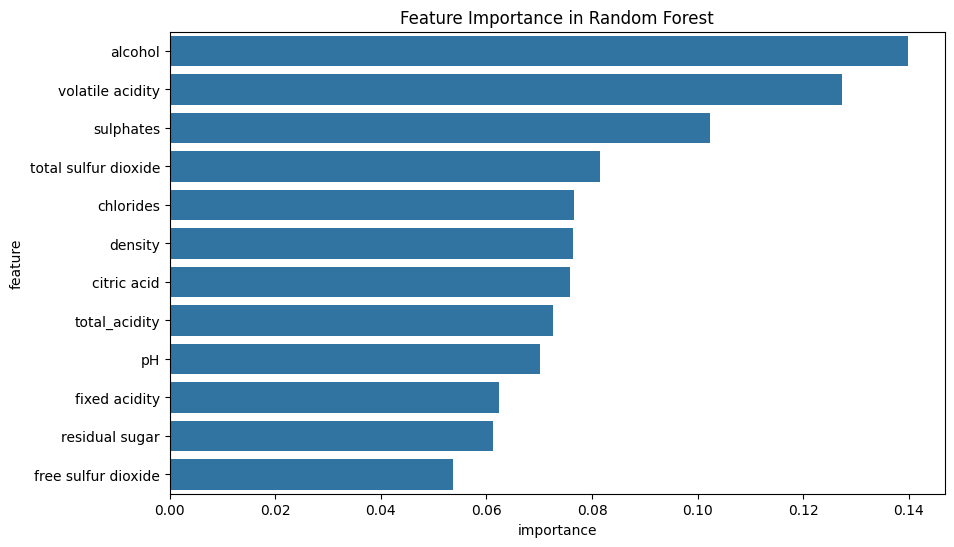

In [6]:
# visualize feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': best_rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest')
plt.show()

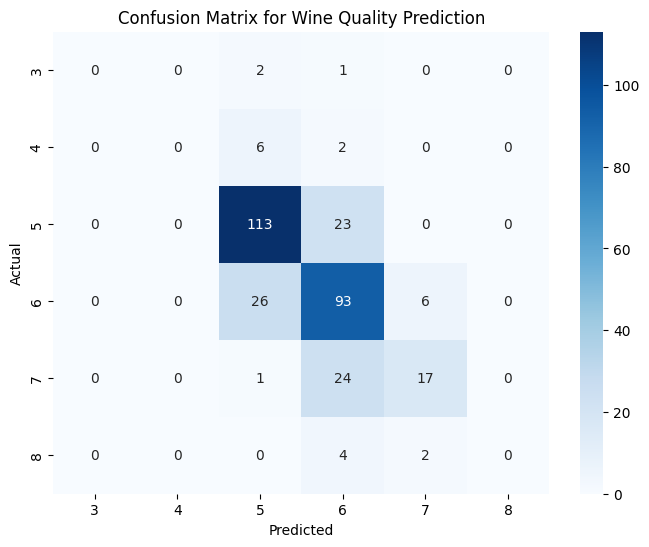

In [7]:
# visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['quality'].unique()), yticklabels=sorted(data['quality'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Wine Quality Prediction')
plt.show()

In [8]:
# save the trained model2 to a file using joblib for later use
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True) 
model_filename = os.path.join(model_dir, 'wine_quality_model.pkl') 
joblib.dump(best_rf, model_filename) 
print(f'Model saved as {model_filename}')

Model saved as ./04_random_forest/model/wine_quality_model.pkl


In [9]:
# load the model and run a prediction test 
loaded_model = joblib.load(model_filename)

# for Wine Quality, use a sample input instead of test.csv (since no separate test file is provided)
sample_input = scaler.transform([[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 8.1]])  # example feature values
sample_prediction = loaded_model.predict(sample_input)
print(f'Predicted Wine Quality for sample input: {sample_prediction[0]}')

Predicted Wine Quality for sample input: 5


/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
